In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('../data/cleaned_df.csv')

In [74]:
df.columns

Index(['Unnamed: 0', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Street', 'Side', 'City', 'County', 'State', 'Timezone',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [75]:
df = df[['Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Severity']]

In [77]:
# Converting booleans to integers for visualization and analysis
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

# Exploratory Data Analysis

In [91]:
# Exploring each explanatory variable's distributions
# Each column's count will be the same, while their 25-50-75% will be the same as well as they're all binary
for col in df.columns[:-1]:
    print(f'\n{col}: \n{df[col].describe()}')


Junction: 
count    2.731050e+06
mean     1.021494e-01
std      3.028447e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Junction, dtype: float64

No_Exit: 
count    2.731050e+06
mean     1.521393e-03
std      3.897536e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: No_Exit, dtype: float64

Railway: 
count    2.731050e+06
mean     7.902089e-03
std      8.854179e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Railway, dtype: float64

Roundabout: 
count    2.731050e+06
mean     4.284067e-05
std      6.545139e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Roundabout, dtype: float64

Station: 
count    2.731050e+06
mean     2.403984e-02
std      1.531729e-01
min      0.000000e+00
25%      0.000000e+00
50%

There are only 0 values within Turning_Loop, so I'll be dropping this column moving forward.

In [92]:
df.drop('Turning_Loop', axis = 1, inplace = True)

In [111]:
df['Severity'].value_counts(ascending = False, normalize = True)

2    0.890728
3    0.054476
4    0.045459
1    0.009337
Name: Severity, dtype: float64

Very imbalanced classes, 89% of the accidents in the dataset are of class 2 severity.

All of my features are binary, categorical variables so I'll be constructing bar plots to visualize their distributions based on the target variable, severity.

In [93]:
# Finding each feature's proportions based on severity class
props = df.groupby('Severity').mean()
props

,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,,,,,,,,
1,0.087533,0.006353,0.020942,0.000078,0.039570,0.020275,0.001020,0.461195
2,0.095644,0.001468,0.007694,0.000044,0.024753,0.018034,0.000625,0.088737
3,0.199715,0.001613,0.009074,0.000013,0.017274,0.008543,0.000437,0.108061
4,0.115706,0.001474,0.007894,0.000040,0.014990,0.021490,0.000354,0.102963


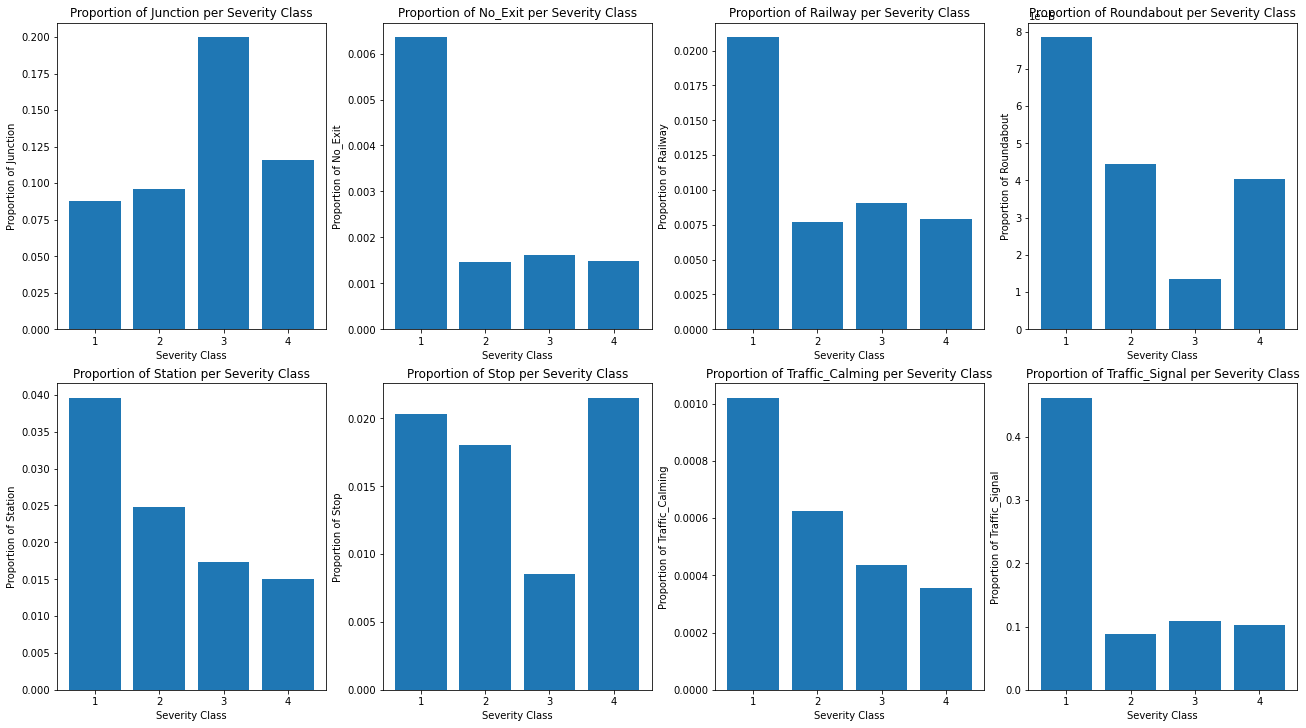

In [112]:
col_index = 0
fig, ax = plt.subplots(nrows = 2, ncols = 4, constrained_layout = True, figsize = (18, 10))
for i in range(2):
    for x in range(4):
        col_name = props.columns[col_index]
        ax[i][x].bar(props.index, props[col_name])
        ax[i][x].set_title(f'Proportion of {col_name} per Severity Class')
        ax[i][x].set_ylabel(f'Proportion of {col_name}')
        ax[i][x].set_xlabel('Severity Class')
        col_index += 1

### Observations
- Junctions are common amongst class 3 severities
- No_Exits are common amongst class 1 severities
- Railways are common amongst class 1 severities
- Roundabouts are common amongst class 1 severities, very uncommon amongst class 3 severities
- There's a negative correlation between severity class and the presence of a Railway Station
- Stops are uncommon amongst class 3 severities
- There's a negative correlation between severity class and the presence of Traffic_Calming measures
- Traffic_Signals are very common amongst class 1 severities